In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('./src/USA_cars_datasets.csv')

Построим модель линейной регрессии. 

Линейная регрессия (Linear regression) — модель зависимости переменной от одной или нескольких других независимых переменных с линейной функцией зависимости. 

В данном случае модель регрессии должна быть уместна для зависимой переменной пробега авто от независимой переменной года выпуска авто. Построим эту модель.

In [3]:
x = data.year.values.reshape(-1, 1)
y = data.mileage.values

model = LinearRegression().fit(x,y)

y_pred = model.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

Построим график ошибки, чтобы увидеть, насколько корректно наша модель отражает зависимость между данными. 

Также посмотрим на коэффициент детерминации — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными.

R2:  0.3536514481526304


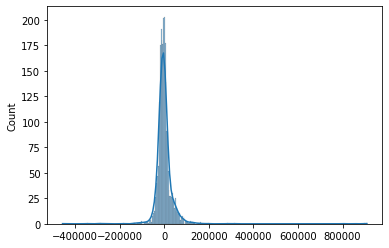

In [4]:
print('R2: ', r2_score(y, y_pred))

sns.histplot(data=(y - y_pred), kde=True)

Теперь заметно, что большинство данных угаданы верно или с ошибкой близкой к нулю. Построим аналогичную модель регрессии, но теперь для самых популярных марок авто в США - Форда и Додж.

In [5]:
new_data = data[(data.brand == 'ford') | (data.brand == 'dodge')]
x2 = new_data.year.values.reshape(-1, 1)
y2 = new_data.mileage.values
model2 = LinearRegression().fit(x2,y2)

y2_pred = model2.predict(x2.reshape(-1, 1))

Построим график ошибки.

R2:  0.42686802902900023


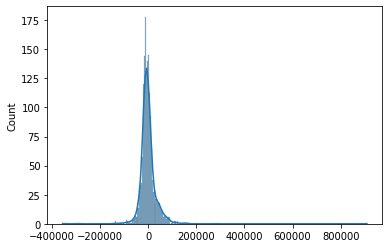

In [6]:
print('R2: ', r2_score(y2, y2_pred))

sns.histplot(data=(y2 - y2_pred), kde=True)

Большинство результатов были предсказанны верно. Однако R-квадрат выше, чем на всех марках авто... 

Попробуем разделить датасет на данные для обучения и данные для проверки.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

model = LinearRegression().fit(x_train, y_train)

y_pred_test = model.predict(x_test.reshape(-1, 1))

Посмотрим на график ошибки и на R-квадрат.

R2:  0.431965892161446


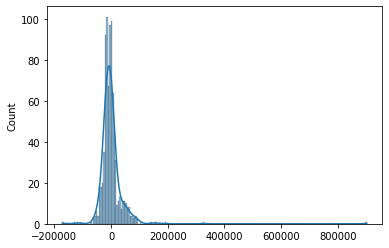

In [12]:
print('R2: ', r2_score(y_test, y_pred_test))

sns.histplot(data=(y_test - y_pred_test), kde=True)

Заметно, что R-квадрат стал ближе к 1. Это говорит о правильности решения разбиения датасета на обучающую и проверочную выборки.